# 📚 ***Import libraries***

In [23]:
# base libraries for data science
import sys
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# configuration to show only 2 decimal places
pd.set_option("display.float_format", "{:.2f}".format)

In [3]:
# print library version for reproducibility

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)

Python version:  3.12.1 (main, Dec 12 2024, 22:30:56) [GCC 9.4.0]
Pandas version:  2.2.3


# 💾 ***Load data***

In [4]:
DATA_DIR = Path.cwd().resolve().parents[0] / "data"

nyc_houses_df = pd.read_parquet(
    DATA_DIR / "02_intermediate/nyc_houses_fixed.parquet", engine="pyarrow"
)

# 📊 ***Data description***

In [5]:
nyc_houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137276 entries, 0 to 137275
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BUILDING CLASS AT PRESENT       136043 non-null  category      
 1   COMMERCIAL UNITS                137274 non-null  Int64         
 2   BUILDING CLASS CATEGORY         137274 non-null  category      
 3   BUILDING CLASS AT TIME OF SALE  137274 non-null  category      
 4   LOT                             137274 non-null  float64       
 5   TOTAL UNITS                     137274 non-null  Int64         
 6   TAX CLASS AT TIME OF SALE       137274 non-null  float64       
 7   ADDRESS                         137274 non-null  category      
 8   TAX CLASS AT PRESENT            136043 non-null  category      
 9   ZIP CODE                        137274 non-null  float64       
 10  SALE DATE                       137274 non-null  datetim

In [6]:
cols_categorical_nom = ['TAX CLASS AT TIME OF SALE', 'LOT', 'ZIP CODE', 'BOROUGH', 'BLOCK']
nyc_houses_df[cols_categorical_nom] = nyc_houses_df[cols_categorical_nom].astype('category')

In [7]:
nyc_houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137276 entries, 0 to 137275
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BUILDING CLASS AT PRESENT       136043 non-null  category      
 1   COMMERCIAL UNITS                137274 non-null  Int64         
 2   BUILDING CLASS CATEGORY         137274 non-null  category      
 3   BUILDING CLASS AT TIME OF SALE  137274 non-null  category      
 4   LOT                             137274 non-null  category      
 5   TOTAL UNITS                     137274 non-null  Int64         
 6   TAX CLASS AT TIME OF SALE       137274 non-null  category      
 7   ADDRESS                         137274 non-null  category      
 8   TAX CLASS AT PRESENT            136043 non-null  category      
 9   ZIP CODE                        137274 non-null  category      
 10  SALE DATE                       137274 non-null  datetim

In [8]:
# size of the dataframe
nyc_houses_df.shape

(137276, 20)

In [9]:
# sample of the dataframe
nyc_houses_df.sample(5)

,BUILDING CLASS AT PRESENT,COMMERCIAL UNITS,BUILDING CLASS CATEGORY,BUILDING CLASS AT TIME OF SALE,LOT,TOTAL UNITS,TAX CLASS AT TIME OF SALE,ADDRESS,TAX CLASS AT PRESENT,ZIP CODE,SALE DATE,NEIGHBORHOOD,RESIDENTIAL UNITS,GROSS SQUARE FEET,BOROUGH,BLOCK,SALE PRICE,APARTMENT NUMBER,YEAR BUILT,LAND SQUARE FEET
98832,A1,0,01 ONE FAMILY DWELLINGS,A1,92.00,1,1.00,9 FLORENCE STREET,1,10308.00,2017-01-31,GREAT KILLS,1,1760.00,5.00,5156.00,635000.00,NaN,1988,5037.00
16483,C6,0,09 COOPS - WALKUP APARTMENTS,C6,1.00,0,2.00,"196-43 DUNTON AVENUE, 2C",2,11423.00,2017-03-02,HOLLISWOOD,0,NaN,4.00,10524.00,215000.00,NaN,1950,NaN
107414,NaN,0,01 ONE FAMILY DWELLINGS,A5,7.00,0,1.00,151 SAND LANE,NaN,10305.00,2017-05-31,ARROCHAR,0,NaN,5.00,3108.00,381264.00,NaN,0,NaN
41555,R4,0,13 CONDOS - ELEVATOR APARTMENTS,R4,1254.00,1,2.00,13 EAST 11TH STREET,2,10003.00,2016-10-28,GREENWICH VILLAGE-CENTRAL,1,NaN,1.00,569.00,NaN,4L,0,NaN
100893,R4,0,13 CONDOS - ELEVATOR APARTMENTS,R4,1253.00,1,2.00,205 WATER STREET,2,11201.00,2017-03-31,DOWNTOWN-FULTON FERRY,1,0.00,3.00,31.00,0.00,6F,2010,0.00


In [10]:
# Null Values
nyc_houses_df.isnull().sum()

BUILDING CLASS AT PRESENT           1233
COMMERCIAL UNITS                       2
BUILDING CLASS CATEGORY                2
BUILDING CLASS AT TIME OF SALE         2
LOT                                    2
TOTAL UNITS                            2
TAX CLASS AT TIME OF SALE              2
ADDRESS                                2
TAX CLASS AT PRESENT                1233
ZIP CODE                               2
SALE DATE                              2
NEIGHBORHOOD                           2
RESIDENTIAL UNITS                      2
GROSS SQUARE FEET                  44868
BOROUGH                                2
BLOCK                                  2
SALE PRICE                         23668
APARTMENT NUMBER                  106257
YEAR BUILT                             2
LAND SQUARE FEET                   42602
dtype: int64

In [11]:
null_percentage = (nyc_houses_df.isnull().sum() / len(nyc_houses_df)) * 100
null_percentage

BUILDING CLASS AT PRESENT         0.90
COMMERCIAL UNITS                  0.00
BUILDING CLASS CATEGORY           0.00
BUILDING CLASS AT TIME OF SALE    0.00
LOT                               0.00
TOTAL UNITS                       0.00
TAX CLASS AT TIME OF SALE         0.00
ADDRESS                           0.00
TAX CLASS AT PRESENT              0.90
ZIP CODE                          0.00
SALE DATE                         0.00
NEIGHBORHOOD                      0.00
RESIDENTIAL UNITS                 0.00
GROSS SQUARE FEET                32.68
BOROUGH                           0.00
BLOCK                             0.00
SALE PRICE                       17.24
APARTMENT NUMBER                 77.40
YEAR BUILT                        0.00
LAND SQUARE FEET                 31.03
dtype: float64

***Target Variable =*** SALE PRICE

***Numerical variables***

In [12]:
nyc_houses_df.describe()

,COMMERCIAL UNITS,TOTAL UNITS,SALE DATE,RESIDENTIAL UNITS,GROSS SQUARE FEET,SALE PRICE,YEAR BUILT,LAND SQUARE FEET
count,137274.00,137274.00,137274,137274.00,92408.00,113608.00,137274.00,94674.00
mean,0.19,2.14,2017-02-25 23:31:04.119935232,1.92,3802.32,1289728.29,1788.46,3804.91
min,0.00,0.00,2016-09-01 00:00:00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,2016-11-29 00:00:00,0.00,1040.00,226000.00,1920.00,1639.25
50%,0.00,1.00,2017-02-27 00:00:00,1.00,1680.00,530245.50,1940.00,2329.00
75%,0.00,2.00,2017-05-26 00:00:00,2.00,2558.00,950000.00,1965.00,3510.00
max,2261.00,2261.00,2017-08-31 00:00:00,894.00,1617206.00,2210000000.00,2017.00,4252327.00
std,9.36,15.35,NaN,12.10,24341.47,12376806.85,538.73,33942.29


***Categorical variables***

In [13]:
# categorical columns description
nyc_houses_df.describe(include="category")

,BUILDING CLASS AT PRESENT,BUILDING CLASS CATEGORY,BUILDING CLASS AT TIME OF SALE,LOT,TAX CLASS AT TIME OF SALE,ADDRESS,TAX CLASS AT PRESENT,ZIP CODE,NEIGHBORHOOD,BOROUGH,BLOCK,APARTMENT NUMBER
count,136043,137274,137274,137274.00,137274.00,137274,136043,137274.00,137274,137274.00,137274.00,31019
unique,163,47,164,2421.00,4.00,55001,10,185.00,253,5.00,11081.00,3486
top,D4,01 ONE FAMILY DWELLINGS,R4,1.00,1.00,131-05 40TH ROAD,1,10314.00,FLUSHING-NORTH,4.00,5066.00,4
freq,20563,29626,21240,6584.00,67337.00,351,62634,2779.00,4982,43205.00,648.00,485


# 📈 ***Univariate Analysis***

#### ***Target Variable***

In [22]:
print(nyc_houses_df['SALE PRICE'].describe())

count       113608.00
mean       1289728.29
std       12376806.85
min              0.00
25%         226000.00
50%         530245.50
75%         950000.00
max     2210000000.00
Name: SALE PRICE, dtype: float64


<Axes: >

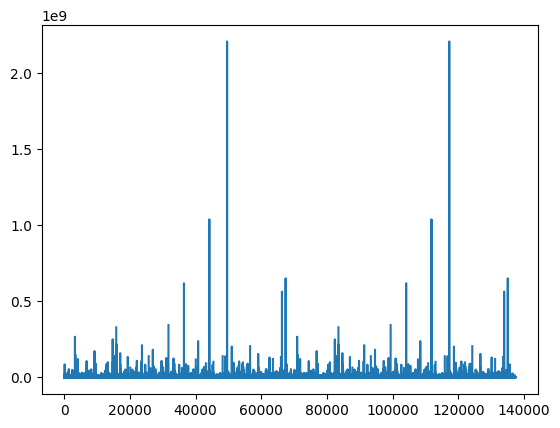

In [28]:
nyc_houses_df['SALE PRICE'].plot()